## Task1 Extract the SIFT features


### Preparation before work


In [1]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Image1.jpg')
img2 = cv2.imread('Image2.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

numbers of kp1_20: 20
numbers of kp2_20: 20


(<Axes: title={'center': 'Image2  20 prominents '}>,
 Text(0.5, 1.0, 'Image2  20 prominents '))

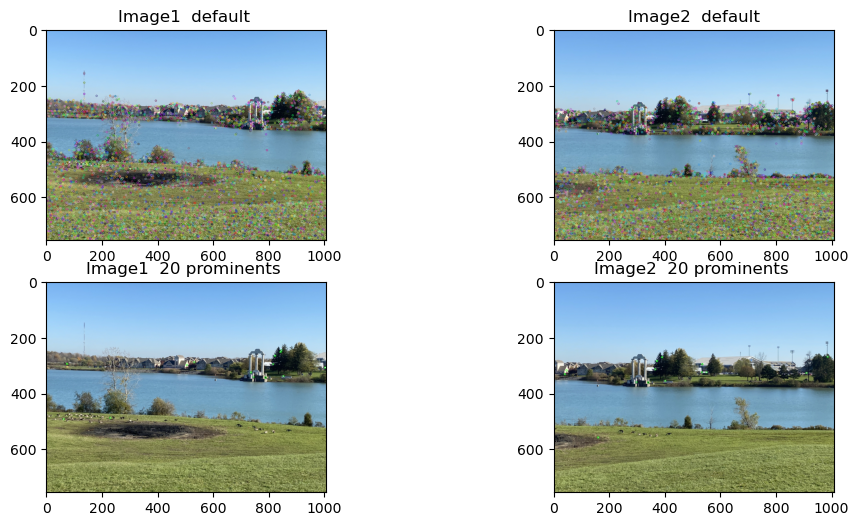

In [2]:
# part a  default parameters
sift_dafault = cv2.SIFT_create()
kp1, des1 = sift_dafault.detectAndCompute(gray1, None)
kp2, des2 = sift_dafault.detectAndCompute(gray2, None)

img1_kp = cv2.drawKeypoints(img1, kp1, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img2_kp = cv2.drawKeypoints(img2, kp2, None, flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

# part b  20 prominents
sift_20 = cv2.SIFT_create(nfeatures=20)
# contrastThresold can do this too
#sift_20 = cv2.SIFT_create(contrastThreshold=0.01)

kp1_20, des1_20 = sift_20.detectAndCompute(gray1, None)
kp2_20, des2_20 = sift_20.detectAndCompute(gray2, None)
print("numbers of kp1_20:", len(kp1_20))
print("numbers of kp2_20:", len(kp2_20))

img1_kp_20 = cv2.drawKeypoints(img1, kp1_20, None, color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
img2_kp_20 = cv2.drawKeypoints(img2, kp2_20, None, color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)

#show and compare

plt.figure(figsize=(12,6))
plt.subplot(2,2,1), plt.imshow(cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB)), plt.title('Image1  default ')
plt.subplot(2,2,2), plt.imshow(cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB)), plt.title('Image2  default')
plt.subplot(2,2,3), plt.imshow(cv2.cvtColor(img1_kp_20, cv2.COLOR_BGR2RGB)), plt.title('Image1  20 prominents ')
plt.subplot(2,2,4), plt.imshow(cv2.cvtColor(img2_kp_20, cv2.COLOR_BGR2RGB)), plt.title('Image2  20 prominents ')

## Task 2  

### recomputer SIFT features

numbers of Image1  scaled 120%: 20
numbers of Image2  scaled 120%: 20
numbers of Image1  rotated 60 degree: 20
numbers of Image2  rotated 60 degree: 20
numbers of Image1  with salt and pepper noise: 20
numbers of Image2  with salt and pepper noise: 20


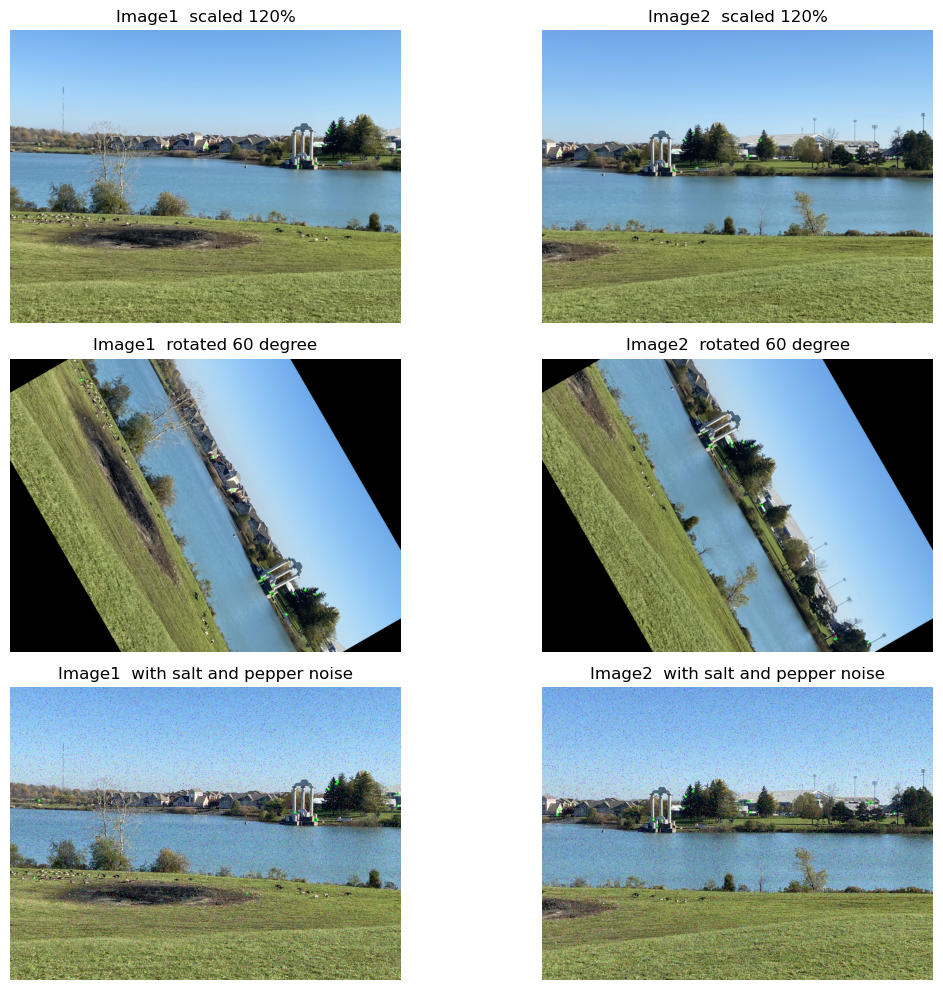

In [3]:
from skimage.util import random_noise


def show_kps(img, title,sift):
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray, None)
    print(f"numbers of {title}:", len(kp))
    img_kp = cv2.drawKeypoints(img, kp, None, color=(0,255,0),flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
    plt.imshow(cv2.cvtColor(img_kp, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    

img1=cv2.imread('Image1.jpg')
img2=cv2.imread('Image2.jpg')

sift=cv2.SIFT_create(nfeatures=20)

plt.figure(figsize=(12,10))

# part a : scale 120%
img1_scaled=cv2.resize(img1, None, fx=1.2, fy=1.2)
img2_scaled=cv2.resize(img2, None, fx=1.2, fy=1.2)

plt.subplot(3,2,1); show_kps(img1_scaled, 'Image1  scaled 120%',sift)
plt.subplot(3,2,2); show_kps(img2_scaled, 'Image2  scaled 120%',sift)


# part b : rotate 60 degree

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w / 2, h / 2)
    M = cv2.getRotationMatrix2D(center, -angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

img1_rotated=rotate_image(img1, 60)
img2_rotated=rotate_image(img2, 60)
plt.subplot(3,2,3); show_kps(img1_rotated, 'Image1  rotated 60 degree',sift)
plt.subplot(3,2,4); show_kps(img2_rotated, 'Image2  rotated 60 degree',sift)

# part c : add salt and pepper noise
def add_salt_and_pepper_noise(image, amount=0.05):
    noisy = random_noise(image, mode='s&p', amount=amount)
    noisy = (255*noisy).astype('uint8')
    return noisy

img1_noisy=add_salt_and_pepper_noise(img1, amount=0.05)
img2_noisy=add_salt_and_pepper_noise(img2, amount=0.05)

plt.subplot(3,2,5); show_kps(img1_noisy, 'Image1  with salt and pepper noise',sift)
plt.subplot(3,2,6); show_kps(img2_noisy, 'Image2  with salt and pepper noise',sift)

plt.tight_layout()
plt.show()


# Analysis of Results

**(a) Scaling (120%)**  
The extracted SIFT keypoints on the scaled images are nearly identical to those in the original images.  
This shows that SIFT is **scale-invariant**, since it detects features in scale space.

**(b) Rotation (60°)**  
After rotating the images, the keypoints remain stable, although their orientations are adjusted.  
This demonstrates that SIFT is **rotation-invariant**, as each keypoint is assigned a dominant orientation.  

**(c) Salt-and-Pepper Noise**  
Noise introduces additional spurious keypoints and weakens some true ones, but the strongest keypoints remain visible.  
This indicates that SIFT is only **partially robust to noise**, compared to scaling and rotation.  
  


## Task 3  
### Match and stitch

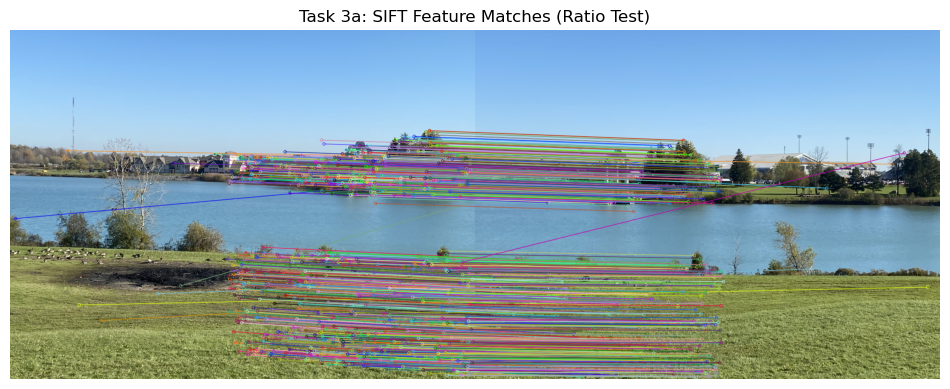

Homography matrix:\n [[ 1.20965966e+00 -2.78676089e-02 -5.48956238e+02]
 [ 6.50574883e-02  1.15916455e+00 -2.58957364e+01]
 [ 2.24532171e-04 -1.59016371e-05  1.00000000e+00]]
Matches / Inliers: 951 / 650
canvas size: 1585 887 tx,ty: 576.96014 25.895737


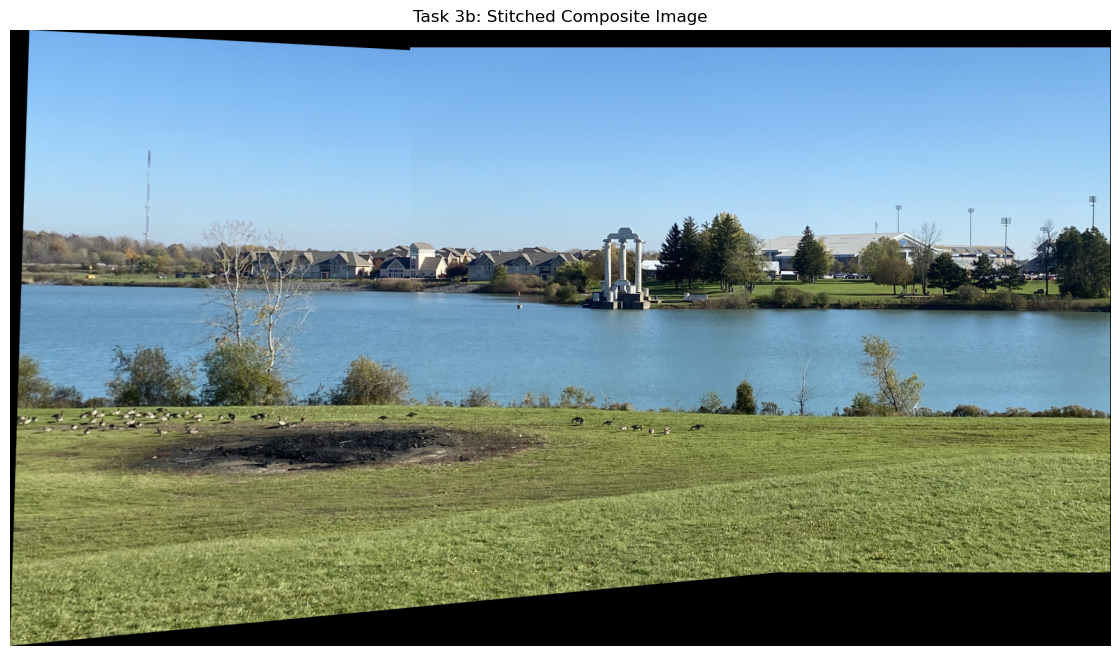

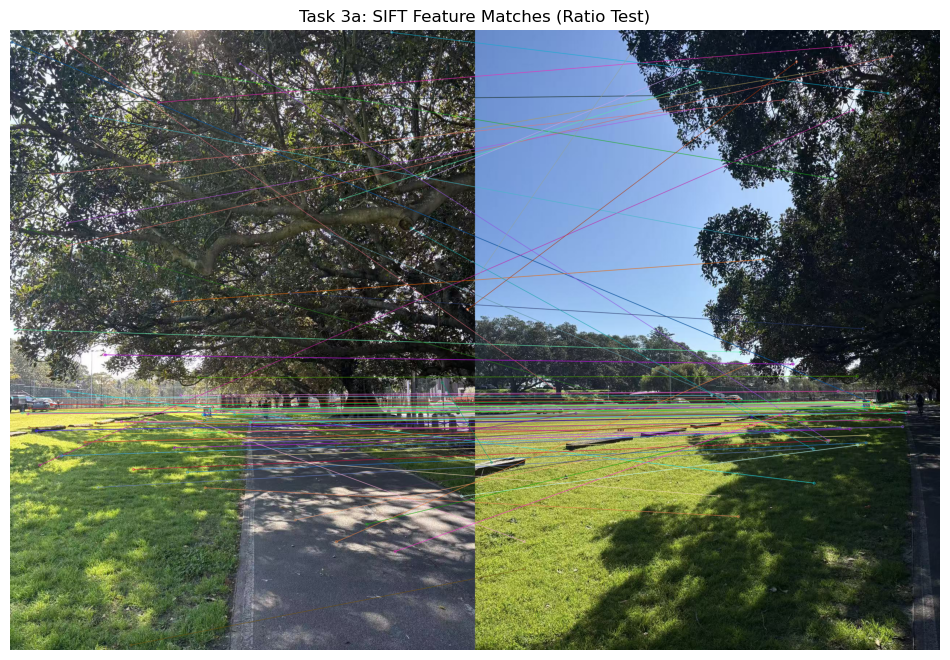

Homography matrix:\n [[-1.95373543e+00 -6.41413843e+00  3.86101151e+03]
 [ 1.17951935e+00 -8.08272434e+00  4.07721675e+03]
 [ 1.12687296e-03 -5.02006570e-03  1.00000000e+00]]
Matches / Inliers: 101 / 42
canvas size: 3862 4078 tx,ty: 0 0


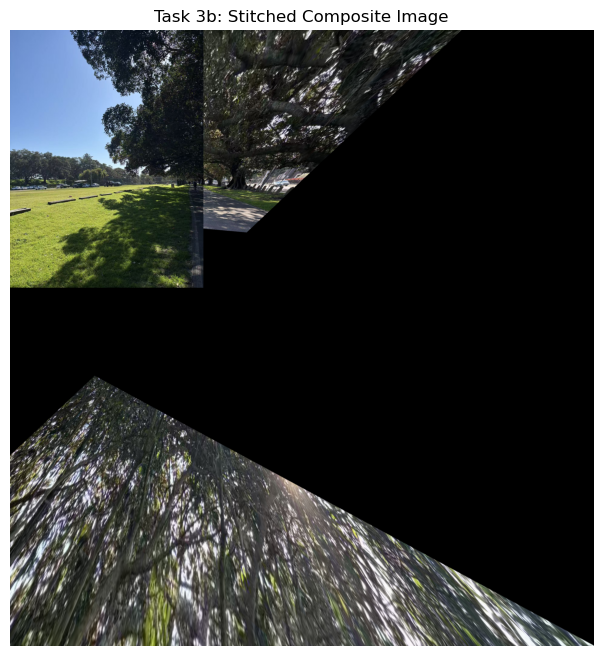

In [14]:
# preparation
import numpy as np

def task3(img1_path, img2_path):
    img1 = cv2.imread(img1_path)
    img2 = cv2.imread(img2_path)

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    #computer SIFT features
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

    # bfmatcher and knn 
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(12, 10))
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.title('Task 3a: SIFT Feature Matches (Ratio Test)')
    plt.axis('off')
    plt.show()

    # part b 

    # compute homography

    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ]).reshape(-1,1,2)

    if len(good_matches) < 4:
        print("Not enough matches:", len(good_matches))
        return None

    H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    if H is None:
        print("findHomography failed")
        return None
    print("Homography matrix:\\n", H)
    inliers = int(mask.sum()) if mask is not None else 0
    print("Matches / Inliers:", len(good_matches), "/", inliers)

    #   RANSAC inlier matches 
    h1,w1 = img1.shape[:2]
    h2,w2 = img2.shape[:2]

    corners1 = np.float32([[0,0],[w1,0],[w1,h1],[0,h1]]).reshape(-1,1,2)
    warped_corners1 = cv2.perspectiveTransform(corners1, H)
    corners2 = np.float32([[0,0],[w2,0],[w2,h2],[0,h2]]).reshape(-1,1,2)

    

    all_corners = np.vstack((warped_corners1, corners2))
    xs = all_corners[:,0,0]
    ys = all_corners[:,0,1]
    min_x, min_y = xs.min(), ys.min()
    max_x, max_y = xs.max(), ys.max()

    
    tx = -min_x if min_x < 0 else 0
    ty = -min_y if min_y < 0 else 0
    trans = np.array([[1,0,tx],[0,1,ty],[0,0,1]])

    out_w = int(np.ceil(max_x + tx))
    out_h = int(np.ceil(max_y + ty))
    print("canvas size:", out_w, out_h, "tx,ty:", tx, ty)

    
    result = cv2.warpPerspective(img1, trans.dot(H), (out_w, out_h))
    
    x_offset = int(tx)
    y_offset = int(ty)
    result[y_offset:y_offset+h2, x_offset:x_offset+w2] = img2

    plt.figure(figsize=(15, 8))
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)) 
    plt.title("Task 3b: Stitched Composite Image")
    plt.axis("off")
    plt.show()
    return result


result1 = task3("Image1.jpg", "Image2.jpg")

result2 = task3("Image3.jpg", "Image4.jpg")





